##Load dataset from CSV

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
#print(tf.__version__)
import gc
gc.collect()

22

In [ ]:
df = pd.read_csv("drive/My Drive/dataset/dataset_2_percent_processed.csv")

##Remove timestamp column and redundant rows

In [ ]:
#Remove timestamp columns
dfu = df.drop(['frame.time_epoch'], axis=1)
#Remove redundant rows
dfu = dfu[~dfu.duplicated()]
del df

In [ ]:
dfu[['category', 'subcategory']].groupby(['category', 'subcategory']).size()

category  subcategory      
DDoS      DDoS_HTTP             194417
          DDoS_TCP              999444
          DDoS_UDP             1000054
DoS       DoS_HTTP              287480
          DoS_TCP               998703
          DoS_UDP               999977
Normal    Normal               2543626
Scan      OS                    827058
          Service               999895
Theft     Data_Exfiltration     301710
          Keylogging             11387
dtype: int64

In [ ]:
dfu.dtypes

frame.len                     int64
ip.proto                    float64
srcport                     float64
dstport                     float64
trans.stream                float64
trans.length                float64
tcp.analysis.initial_rtt    float64
tcp.time_delta              float64
tcp.time_relative           float64
tcp.flags                     int64
tcp.window_size_value       float64
tcp.hdr_len                 float64
http.response.code          float64
http.request.method          object
http.content_length         float64
ip.ttl_1                    float64
ip.ttl_2                    float64
ip.hdr_len_1                float64
ip.hdr_len_2                float64
ip.len_1                    float64
ip.len_2                    float64
ip.id_1                       int64
ip.id_2                       int64
ip.flags.df                 float64
attack                        int64
category                     object
subcategory                  object
dtype: object

In [ ]:
dfu.count()

frame.len                   9163751
ip.proto                    9163751
srcport                     9163751
dstport                     9163751
trans.stream                9163751
trans.length                9163751
tcp.analysis.initial_rtt    9163751
tcp.time_delta              9163751
tcp.time_relative           9163751
tcp.flags                   9163751
tcp.window_size_value       9163751
tcp.hdr_len                 9163751
http.response.code          9163751
http.request.method         9163751
http.content_length         9163751
ip.ttl_1                    9163751
ip.ttl_2                    9163751
ip.hdr_len_1                9163751
ip.hdr_len_2                9163751
ip.len_1                    9163751
ip.len_2                    9163751
ip.id_1                     9163751
ip.id_2                     9163751
ip.flags.df                 9163751
attack                      9163751
category                    9163751
subcategory                 9163751
dtype: int64

##Check categorical columns

In [ ]:
df.dtypes

frame.time_epoch            float64
frame.len                     int64
ip.proto                    float64
srcport                     float64
dstport                     float64
trans.stream                float64
trans.length                float64
tcp.analysis.initial_rtt    float64
tcp.time_delta              float64
tcp.time_relative           float64
tcp.flags                     int64
tcp.window_size_value       float64
tcp.hdr_len                 float64
http.response.code          float64
http.request.method          object
http.content_length         float64
ip.ttl_1                    float64
ip.ttl_2                    float64
ip.hdr_len_1                float64
ip.hdr_len_2                float64
ip.len_1                    float64
ip.len_2                    float64
ip.id_1                       int64
ip.id_2                       int64
ip.flags.df                 float64
attack                        int64
category                     object
subcategory                 

In [ ]:
df[df['ip.ttl_2'] != 0.0].groupby('attack').count()

,frame.time_epoch,frame.len,ip.proto,srcport,dstport,trans.stream,trans.length,tcp.analysis.initial_rtt,tcp.time_delta,tcp.time_relative,tcp.flags,tcp.window_size_value,tcp.hdr_len,http.response.code,http.request.method,http.content_length,ip.ttl_1,ip.ttl_2,ip.hdr_len_1,ip.hdr_len_2,ip.len_1,ip.len_2,ip.id_1,ip.id_2,ip.flags.df,category,subcategory
attack,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,133324,133324,133324,133324,133324,133324,133324,133324,133324,133324,133324,133324,133324,133324,133324,133324,133324,133324,133324,133324,133324,133324,133324,133324,133324,133324,133324


In [ ]:
dfu['subcategory'].unique()

array(['Normal', 'DDoS_HTTP', 'DoS_HTTP', 'OS', 'Service', 'DDoS_TCP',
       'DoS_TCP', 'DDoS_UDP', 'DoS_UDP', 'Data_Exfiltration',
       'Keylogging'], dtype=object)

In [ ]:
dfu['ip.proto'].unique()

array([ 6., 17.,  0.,  1.,  4.,  3.,  2.])

In [ ]:
dfu['tcp.flags'].unique()

array([   0, 2243,   16,   24,    2,   18,   17,   20,    4,   25, 2242,
         82,   43,   41,    1])

In [ ]:
dfu['ip.flags.df'].unique()

array([0., 1., 4., 2., 3.])

In [ ]:
dfu['http.response.code'].unique()

array([  0., 404., 200., 505., 405., 501., 302., 400., 301., 403., 408.,
       401.])

In [ ]:
len(dfu['dstport'].unique())

65529

In [ ]:
len(dfu['http.request.method'].unique())

In [ ]:
dfu.groupby(['frame.len', 'ip.proto', 'srcport', 'dstport', 'trans.stream', 'trans.length', 
             'tcp.analysis.initial_rtt', 'tcp.time_delta', 'tcp.time_relative', 'tcp.flags', 'tcp.window_size_value', 'tcp.hdr_len',
             'http.response.code', 'http.request.method', 'http.content_length',
             'ip.ttl_1', 'ip.ttl_2', 'ip.hdr_len_1', 'ip.hdr_len_2', 'ip.len_1', 'ip.len_2', 'ip.id_1', 'ip.id_2', 
             'ip.flags.df'])['category'].value_counts().unstack(fill_value=0).reset_index().rename_axis(None, axis=1)

,frame.len,ip.proto,srcport,dstport,trans.stream,trans.length,tcp.analysis.initial_rtt,tcp.time_delta,tcp.time_relative,tcp.flags,tcp.window_size_value,tcp.hdr_len,http.response.code,http.request.method,http.content_length,ip.ttl_1,ip.ttl_2,ip.hdr_len_1,ip.hdr_len_2,ip.len_1,ip.len_2,ip.id_1,ip.id_2,ip.flags.df,DDoS,DoS,Normal,Scan,Theft
0,42,0.0,65536.0,65536.0,1283658.0,65161.0,0.000000,1014.966603,1998.184144,0xFFFFFFFF,65536.0,0.0,0.0,NO,261180.0,0.0,0.0,0.0,0.0,0.0,0.0,0xFFFFFFFF,0xFFFFFFFF,4.0,0,0,1,0,0
1,60,0.0,65536.0,65536.0,1283658.0,65161.0,0.000000,1014.966603,1998.184144,0xFFFFFFFF,65536.0,0.0,0.0,NO,261180.0,0.0,0.0,0.0,0.0,0.0,0.0,0xFFFFFFFF,0xFFFFFFFF,4.0,0,0,1,0,0
2,60,1.0,65536.0,65536.0,1283658.0,65161.0,0.000000,1014.966603,1998.184144,0xFFFFFFFF,65536.0,0.0,0.0,NO,261180.0,0.0,0.0,20.0,0.0,32.0,0.0,0x00000002,0xFFFFFFFF,0.0,0,0,0,1,0
3,60,1.0,65536.0,65536.0,1283658.0,65161.0,0.000000,1014.966603,1998.184144,0xFFFFFFFF,65536.0,0.0,0.0,NO,261180.0,0.0,0.0,20.0,0.0,32.0,0.0,0x00000027,0xFFFFFFFF,0.0,0,0,0,1,0
4,60,1.0,65536.0,65536.0,1283658.0,65161.0,0.000000,1014.966603,1998.184144,0xFFFFFFFF,65536.0,0.0,0.0,NO,261180.0,0.0,0.0,20.0,0.0,32.0,0.0,0x00000369,0xFFFFFFFF,0.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9163746,64294,6.0,49160.0,4444.0,143.0,64240.0,0.000131,0.062031,26.769994,0x00000010,255.0,20.0,0.0,NO,261180.0,0.0,0.0,20.0,0.0,64280.0,0.0,0x000027e2,0xFFFFFFFF,1.0,0,0,0,0,1
9163747,64294,6.0,49160.0,4444.0,143.0,64240.0,0.000131,0.063122,27.877660,0x00000010,254.0,20.0,0.0,NO,261180.0,0.0,0.0,20.0,0.0,64280.0,0.0,0x00002da7,0xFFFFFFFF,1.0,0,0,0,0,1
9163748,64294,6.0,49160.0,4444.0,143.0,64240.0,0.000131,0.063430,41.699495,0x00000010,252.0,20.0,0.0,NO,261180.0,0.0,0.0,20.0,0.0,64280.0,0.0,0x000075c7,0xFFFFFFFF,1.0,0,0,0,0,1
9163749,64294,6.0,49160.0,4444.0,143.0,64240.0,0.000131,0.073164,27.315979,0x00000010,254.0,20.0,0.0,NO,261180.0,0.0,0.0,20.0,0.0,64280.0,0.0,0x00002ac3,0xFFFFFFFF,1.0,0,0,0,0,1


In [ ]:
dfu[['http.request.method', 'attack', 'category', 'subcategory']].groupby('http.request.method')['category'].value_counts().unstack(fill_value=0).add_prefix('flag').reset_index().rename_axis(None, axis=1)

,http.request.method,flagDDoS,flagDoS,flagNormal,flagScan,flagTheft
0,GET,0,0,1,2615,0
1,"GET,GET",0,0,0,2,0
2,"GET,GET,GET",0,0,0,1,0
3,"GET,GET,GET,GET",0,0,0,59,0
4,"GET,GET,GET,GET,GET",0,0,0,1,0
...,...,...,...,...,...,...
88,NO,2174737,2257594,2543625,1822264,313097
89,OPTIONS,0,0,0,671,0
90,POST,19178,28566,0,506,0
91,PROPFIND,0,0,0,43,0


In [ ]:
dfu[['srcport', 'dstport', 'attack', 'category', 'subcategory']].groupby(['srcport', 'dstport'])['category'].value_counts().unstack(fill_value=0).add_prefix('flag').reset_index().rename_axis(None, axis=1)

,srcport,dstport,flagDDoS,flagDoS,flagNormal,flagScan,flagTheft
0,0.0,0.0,0,0,361749,0,0
1,0.0,80.0,35,38,0,0,0
2,1.0,80.0,25,34,1,0,0
3,1.0,1114.0,0,0,0,1,0
4,1.0,1124.0,0,0,0,1,0
...,...,...,...,...,...,...,...
1596541,65535.0,64052.0,0,0,0,2,0
1596542,65535.0,64571.0,0,0,0,2,0
1596543,65535.0,65502.0,0,0,0,2,0
1596544,65535.0,65509.0,0,0,0,1,0


In [ ]:
dfu['http.request.method'].unique()


array(['NO', 'POST', 'GET', 'OPTIONS', 'PROPFIND', 'HEAD', 'TRACE',
       'HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD',
       'HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD',
       'HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD',
       'HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,GET,GET,GET,GET,GET,GET,GET,GET,GET,GET,GET,GET,GET,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD',
       'HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,GET,GET',
       'GET,GET,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,HEAD,H

##Run model with multi-labels

####Process multi-labels

In [ ]:
from sklearn.preprocessing import OneHotEncoder
def encodeFeaturesForMultiLabels(df):
  enc_tcp = OneHotEncoder(handle_unknown='ignore')
  enc_tcp.fit(df[['tcp.flags']])

  enc_pro = OneHotEncoder(handle_unknown='ignore')
  enc_pro.fit(df[['ip.proto']])

  #Stack the sequence of input arrays horizontally (i.e. column wise) to make a single array.
  inputs = np.hstack([df.drop(['srcport', 'dstport', 'tcp.flags', 'ip.proto'], axis=1).values, 
                      enc_tcp.transform(df[['tcp.flags']]).toarray(), 
                      enc_pro.transform(df[['ip.proto']]).toarray()])
  return inputs

In [ ]:
#dfU['subcategory'] = dfU['category'] + dfU['subcategory']
dfM = dfU.groupby(['ip.proto', 'frame.len', 'srcport', 'dstport', 'trans.stream', 'trans.len', 'tcp.analysis.initial_rtt', 'tcp.time_delta', 'tcp.flags', 'tcp.window_size_value', 'ip.ttl_1', 'ip.ttl_2'])['category'].value_counts().unstack(fill_value=0).reset_index().rename_axis(None, axis=1)

In [ ]:
inputs = encodeFeaturesForMultiLabels(dfM[['ip.proto', 'frame.len', 'srcport', 'dstport', 'trans.stream', 'trans.len', 
                                  'tcp.analysis.initial_rtt', 'tcp.time_delta', 'tcp.flags', 'tcp.window_size_value', 
                                  'ip.ttl_1', 'ip.ttl_2']])

In [ ]:
#https://scikit-learn.org/stable/modules/multiclass.html
labels = dfM[['Normal', 'DDoS', 'DoS', 'Reconnaissance', 'Theft']].values

In [ ]:
np.save("drive/My Drive/dataset/multiInputs.npy", inputs)
np.save("drive/My Drive/dataset/multiLabels.npy", labels)

In [ ]:
ports = dfM[['srcport', 'dstport']].values
np.save("drive/My Drive/dataset/multiPorts.npy", ports)

####Run model with embedding

In [ ]:
inputs = np.load("drive/My Drive/dataset/multiInputs.npy")
labels = np.load("drive/My Drive/dataset/multiLabels.npy")
ports = np.load("drive/My Drive/dataset/multiPorts.npy")

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

# Split the data set into training, validation and test
# Data is split in a stratified fashion
X_train, X_test, P_train, P_test, y_train, y_test = train_test_split(inputs, ports, labels, test_size=0.2, stratify=labels, random_state=42)
X_train, X_val, P_train, P_val, y_train, y_val = train_test_split(X_train, P_train, y_train, test_size=0.2, stratify=y_train, random_state=42)

embedding_dim = 16
input_dim = 65536 #input_dim: maximum integer index + 1

np_input = tf.keras.Input(shape=(inputs.shape[1],), name='others')
p_input = tf.keras.Input(shape=(ports.shape[1],), name='ports')

p_feature = tf.keras.layers.Embedding(input_dim, embedding_dim)(p_input)
p_feature = tf.keras.layers.GlobalAveragePooling1D()(p_feature)

merge = tf.keras.layers.concatenate([p_feature, np_input])

hidden1 = tf.keras.layers.Dense(512, activation='relu')(merge)
hidden2 = tf.keras.layers.Dense(512, activation='relu')(hidden1)
classif = tf.keras.layers.Dense(5, activation='sigmoid')(hidden2)

model = tf.keras.Model(inputs=[p_input, np_input], outputs=classif)

model.summary()
#tf.keras.utils.plot_model(model, 'multi_input.png', show_shapes=True)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
ports (InputLayer)              [(None, 2)]          0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 2, 16)        1048576     ports[0][0]                      
__________________________________________________________________________________________________
global_average_pooling1d (Globa (None, 16)           0           embedding[0][0]                  
__________________________________________________________________________________________________
others (InputLayer)             [(None, 30)]         0                                            
______________________________________________________________________________________________

In [ ]:
#checkpoint_path = "drive/My Drive/dataset/model_checkpoint/weights_best_multi.hdf5"
mnn_callbacks = [tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3, verbose=2)]
#tf.keras.callbacks.ModelCheckpoint(checkpoint_path, monitor='loss', save_best_only=True, verbose=1, mode="min")

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit({'ports': P_train, 'others': X_train}, y_train, 
          batch_size=128, epochs=20, validation_data=({'ports': P_val, 'others': X_val}, y_val), callbacks=mnn_callbacks)


Epoch 1/20
36550/36550 [==============================] - 728s 20ms/step - loss: 0.2163 - accuracy: 0.6758 - val_loss: 0.2056 - val_accuracy: 0.6779
Epoch 2/20
36550/36550 [==============================] - 719s 20ms/step - loss: 0.2151 - accuracy: 0.6724 - val_loss: 0.2045 - val_accuracy: 0.6663
Epoch 3/20
36550/36550 [==============================] - 720s 20ms/step - loss: 0.2200 - accuracy: 0.6715 - val_loss: 0.2055 - val_accuracy: 0.6670
Epoch 4/20
36550/36550 [==============================] - 725s 20ms/step - loss: 0.2189 - accuracy: 0.6713 - val_loss: 0.2012 - val_accuracy: 0.6673
Epoch 5/20
36550/36550 [==============================] - 707s 19ms/step - loss: 0.2530 - accuracy: 0.6633 - val_loss: 0.2232 - val_accuracy: 0.6668
Epoch 00005: early stopping


In [ ]:
results = model.predict({'ports': P_test, 'others': X_test})

In [ ]:
results

array([[2.5329590e-03, 4.5596462e-01, 3.3490521e-01, 2.1170080e-03,
        3.7616817e-06],
       [2.5850415e-02, 1.1676216e-01, 1.5385866e-01, 8.9934468e-01,
        1.9198656e-03],
       [2.5850415e-02, 1.1676216e-01, 1.5385866e-01, 8.9934468e-01,
        1.9198656e-03],
       ...,
       [3.6361217e-03, 3.8651335e-01, 3.0080220e-01, 7.6452196e-03,
        9.8618348e-06],
       [4.6934502e-14, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        2.7985398e-09],
       [2.5850415e-02, 1.1676216e-01, 1.5385866e-01, 8.9934462e-01,
        1.9198442e-03]], dtype=float32)

##Encode non-embedding features and labels + save embedding columns

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

def encodeLabels(df):
  print(df['subcategory'].unique())
  enc_labels = LabelEncoder()
  labels = enc_labels.fit_transform(df['subcategory'].values)
  print(enc_labels.transform(df['subcategory'].unique()))
  return labels

def encodeHTTP(df):
  print(df['http.request.method'].unique())
  enc_http = LabelEncoder()
  outputs = enc_http.fit_transform(df['http.request.method'].values)
  print(enc_http.transform(df['http.request.method'].unique()))
  return outputs

def encodeFeatures(df):
  enc_tcp = OneHotEncoder(handle_unknown='ignore')
  enc_tcp.fit(df[['tcp.flags']])
  tcp = enc_tcp.transform(df[['tcp.flags']]).toarray()

  enc_pro = OneHotEncoder(handle_unknown='ignore')
  enc_pro.fit(df[['ip.proto']])
  pro = enc_pro.transform(df[['ip.proto']]).toarray()

  enc_flag = OneHotEncoder(handle_unknown='ignore')
  enc_flag.fit(df[['ip.flags.df']])
  flag = enc_flag.transform(df[['ip.flags.df']]).toarray()
  
  enc_response = OneHotEncoder(handle_unknown='ignore')
  enc_response.fit(df[['http.response.code']])
  response = enc_response.transform(df[['http.response.code']]).toarray()

  # Stack the sequence of input arrays horizontally (i.e. column wise) to make a single array
  inputs = np.hstack([df.drop(['srcport', 'dstport', 'tcp.flags', 'ip.proto', 'ip.flags.df', 'http.response.code', 'http.request.method', 
                 'attack', 'category', 'subcategory'], axis=1).values, tcp, pro, flag, response])
  return inputs

In [ ]:
inputs = encodeFeatures(dfu)
np.save("drive/My Drive/dataset/inputs.npy", inputs)

In [ ]:
labels = encodeLabels(dfu)
np.save("drive/My Drive/dataset/labels.npy", labels)

['Normal' 'DDoS_HTTP' 'DoS_HTTP' 'OS' 'Service' 'DDoS_TCP' 'DoS_TCP'
 'DDoS_UDP' 'DoS_UDP' 'Data_Exfiltration' 'Keylogging']
[ 8  0  4  9 10  1  5  2  6  3  7]


In [ ]:
ports = dfu[['srcport', 'dstport']]
np.save("drive/My Drive/dataset/ports.npy", ports.values)

In [ ]:
http = encodeHTTP(dfu)
np.save("drive/My Drive/dataset/http.npy", http)

[88 90  0 89 91 42 92 86 77 85 68 78 40 79 72 15 27 83 20 10 22 81 87 84
 23 19  9 17 76 57 65 71 80 21 49 34 82 70 18  7 39 69 24 74 51 46 63  1
 14 48  8 11 58  6 55 50 12  3 36 41 38 35 53 64 56 60 75 28 26  2 43 73
 13 29 59 61  5 52 30 33 62 66 54 25 31 67 44 32 37  4 45 47 16]


##Run model with embedding using functional API

In [ ]:
inputs = np.load("drive/My Drive/dataset/inputs.npy")
labels = np.load("drive/My Drive/dataset/labels.npy")
ports = np.load("drive/My Drive/dataset/ports.npy")
http = np.load("drive/My Drive/dataset/http.npy")

In [ ]:
def plot_acc_loss(acc, loss, val_acc, val_loss):
    
    #Summarize history for accuracy
    plt.plot(acc)
    plt.plot(val_acc)
    plt.ylim(0.0, 1.0)
    plt.plot
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    #Summarize history for loss
    plt.plot(loss)
    plt.plot(val_loss)
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    return None

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler

tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

# Change labels
m = {0:1, 1:1, 2:1, 4:1, 5:1, 6:1, 8:0, 7:2, 3:2, 9:3, 10:3}
labels = np.array([m[i] for i in list(labels)])
print(np.unique(labels))

# Obtain shape
input_shape = inputs.shape[1]
port_shape = ports.shape[1]
print(inputs.shape, labels.shape, ports.shape, http.shape)

# Split the data set into training, validation and test
# Data is split in a stratified fashion
X_train, X_test, P_train, P_test, H_train, H_test, y_train, y_test = train_test_split(inputs, ports, http, labels, test_size=0.2, stratify=labels, random_state=42)

del inputs, ports, http, labels
X_train, X_val, P_train, P_val, H_train, H_val, y_train, y_val = train_test_split(X_train, P_train, H_train, y_train, test_size=0.2, stratify=y_train, random_state=42)

# Feature scaling
scaler = MinMaxScaler(feature_range=(-1,1))
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Introduce weights for unbalanced classes
u, indices = np.unique(y_train, return_counts=True)
print(u)
print(indices)

class_weight = {}
for a,b in zip(list(u),list(1/(indices/indices.max()+0.01))):
    class_weight[a] = b
print(class_weight)

[0 1 2 3]
(9163751, 56) (9163751,) (9163751, 2) (9163751,)
[0 1 2 3]
[1627921 2867248  200381 1169250]
{0: 1.7308096612815356, 1: 0.9900990099009901, 2: 12.517810251125633, 3: 2.393517149790861}


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
ports (InputLayer)              [(None, 2)]          0                                            
__________________________________________________________________________________________________
embedding_port (Embedding)      (None, 2, 16)        1048592     ports[0][0]                      
__________________________________________________________________________________________________
http (InputLayer)               [(None,)]            0                                            
__________________________________________________________________________________________________
global_average_pooling1d (Globa (None, 16)           0           embedding_port[0][0]             
______________________________________________________________________________________________

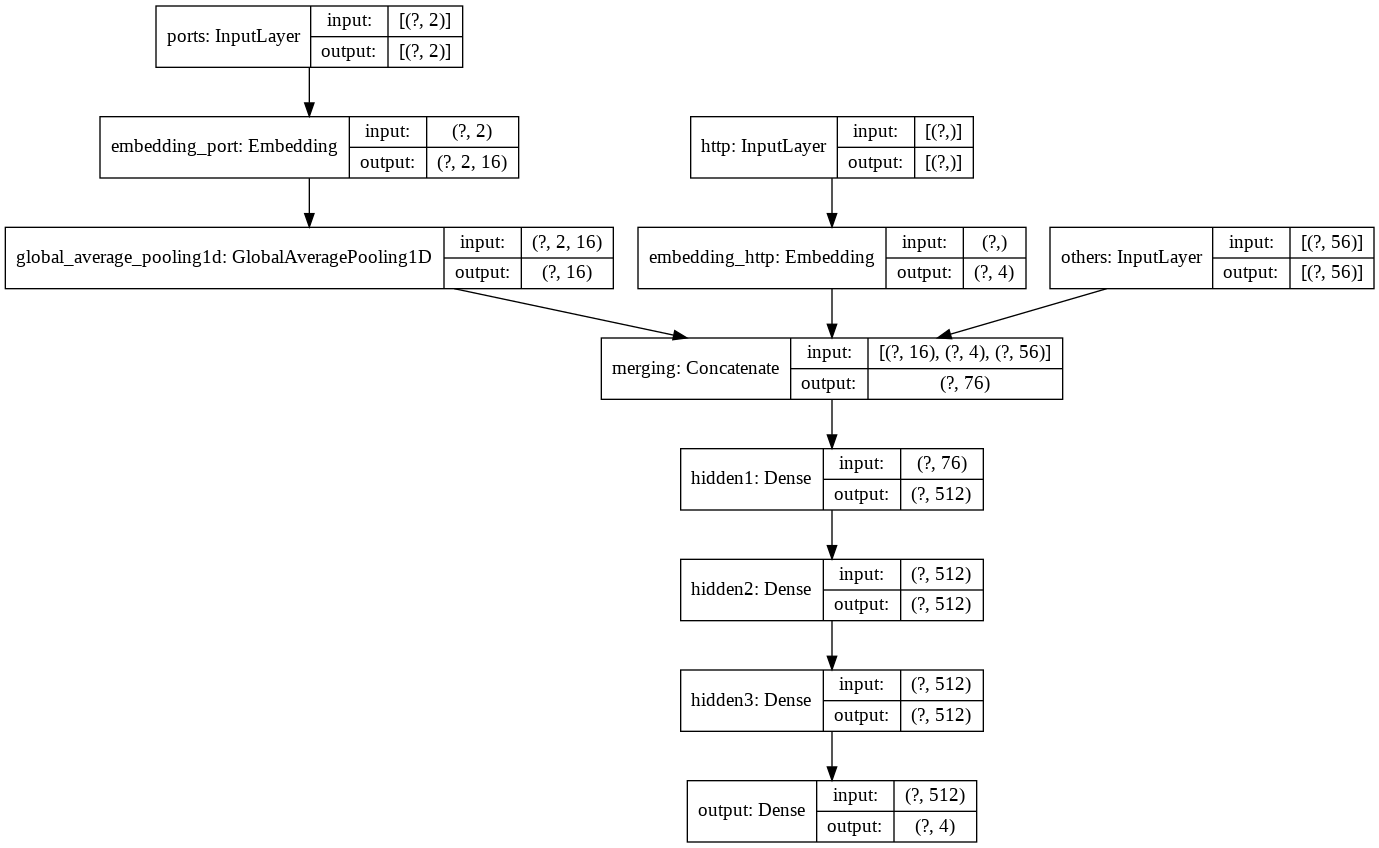

In [ ]:
port_embed_dim = 16
port_dim = 65537 #input_dim: 0-65535 + 65536 (encoded for none)

http_embed_dim = 4
http_dim = 93 #input_dim

nph_input = tf.keras.Input(shape=(input_shape,), name='others')
p_input = tf.keras.Input(shape=(port_shape,), name='ports')
h_input = tf.keras.Input(shape=(), name='http')

p_feature = tf.keras.layers.Embedding(port_dim, port_embed_dim, name='embedding_port')(p_input)
p_feature = tf.keras.layers.GlobalAveragePooling1D()(p_feature)

h_feature = tf.keras.layers.Embedding(http_dim, http_embed_dim, name='embedding_http')(h_input)

merge = tf.keras.layers.concatenate([p_feature, h_feature, nph_input], name='merging')

hidden1 = tf.keras.layers.Dense(512, activation='relu', name='hidden1')(merge)
hidden2 = tf.keras.layers.Dense(512, activation='relu', name='hidden2')(hidden1)
hidden3 = tf.keras.layers.Dense(512, activation='relu', name='hidden3')(hidden2)
classif = tf.keras.layers.Dense(4, activation='softmax', name='output')(hidden3)

model = tf.keras.Model(inputs=[p_input, h_input, nph_input], outputs=classif)

model.summary()
tf.keras.utils.plot_model(model, 'multi_input.png', show_shapes=True)

####Monitor training loss

In [ ]:
checkpoint_path = "drive/My Drive/dataset/model_checkpoint/weights_best_loss.hdf5"
mnn_callbacks = [tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3, verbose=1), 
                 tf.keras.callbacks.ModelCheckpoint(checkpoint_path, monitor='loss', save_best_only=True, verbose=1, mode="min")]

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit({'ports': P_train, 'http': H_train, 'others': X_train}, y_train, 
          batch_size=128, epochs=10, validation_data=({'ports': P_val, 'http': H_val, 'others': X_val}, y_val), 
          class_weight=class_weight, callbacks=mnn_callbacks)

Epoch 1/10
45818/45819 [============================>.] - ETA: 0s - loss: 29.0934 - accuracy: 0.8817
Epoch 00001: loss improved from -inf to 29.09294, saving model to drive/My Drive/dataset/model_checkpoint/weights_best_loss.hdf5
45819/45819 [==============================] - 909s 20ms/step - loss: 29.0929 - accuracy: 0.8817 - val_loss: 0.1416 - val_accuracy: 0.9719
Epoch 2/10
45818/45819 [============================>.] - ETA: 0s - loss: 0.2910 - accuracy: 0.9648
Epoch 00002: loss did not improve from 29.09294
45819/45819 [==============================] - 907s 20ms/step - loss: 0.2910 - accuracy: 0.9648 - val_loss: 0.1018 - val_accuracy: 0.9700
Epoch 3/10
45818/45819 [============================>.] - ETA: 0s - loss: 0.1855 - accuracy: 0.9739
Epoch 00003: loss did not improve from 29.09294
45819/45819 [==============================] - 962s 21ms/step - loss: 0.1855 - accuracy: 0.9739 - val_loss: 0.0678 - val_accuracy: 0.9808
Epoch 4/10
45818/45819 [============================>.] - E

In [ ]:
model.load_weights(checkpoint_path)
test_score = model.evaluate({'ports': P_test, 'http': H_test, 'others': X_test}, y_test, batch_size=128, verbose=2)
print(test_score[0], test_score[1])

# Return the indices of maximum values along an axis (matching classes)
cnf_matrix = confusion_matrix(y_test, np.argmax(model.predict({'ports': P_test, 'http': H_test, 'others': X_test}), axis=-1)) 
cnf_matrix

14319/14319 - 41s - loss: 0.1416 - accuracy: 0.9718
0.14163251221179962 0.971756637096405


array([[507328,   1244,      0,    153],
       [  6692, 879389,      3,   9931],
       [  1548,   1797,  59275,      0],
       [   534,  29826,     35, 334996]])

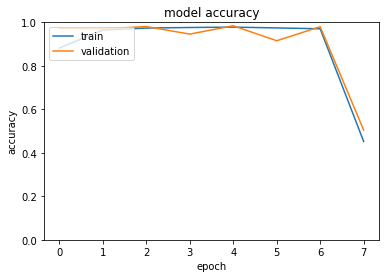

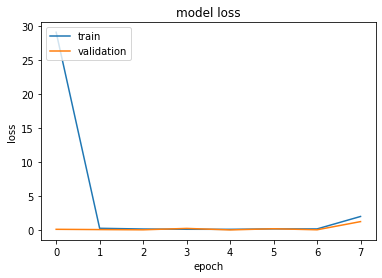

In [ ]:
plot_acc_loss(history.history['accuracy'], history.history['loss'], history.history['val_accuracy'], history.history['val_loss'])

####Retrieve weights

In [ ]:
checkpoint_path = "drive/My Drive/dataset/model_checkpoint/weights_scaler_add_layer_delr_loss.hdf5"
adam = tf.keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.load_weights(checkpoint_path)

In [ ]:
model.layers

In [ ]:
#Retrieve weights
weight_port = model.layers[1].get_weights()[0]
print(weight_port.shape) # shape: (port_size, embedding_dim)

weight_http = model.layers[4].get_weights()[0]
print(weight_http.shape) # shape: (http_size, embedding_dim)

(65537, 16)
(93, 4)
